

# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

<a id='wrangling'></a>
# Data Wrangling

## Gather

Here i will gather the required data from the different sources. My different sources are:
API, .csv, .tsv.  
- the csv is loaded through read_csv method
- the tsv is downloaded programmatically
- the api data is queried and saved

In [2]:
import pandas as pd
import numpy as np
import re
import requests
import tweepy
import tweepy.api as api
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%run 'authorization.py' #importing macros from python file

In [3]:
#load data form the csv
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [152]:
#downloading file programmatically
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv','wb') as file:
        file.write(response.content)

In [4]:
#load data form the tsv
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#  twitter API authentication.
consumer_key = API_KEY 
consumer_secret = API_SECRET 
access_token = ACCESS_TOKEN
access_secret = ACCESS_TOKEN_SECRET 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [ ]:
#data extraction from twitter api using tweet id from twitter_archive table
fails_dict={}
            
lists =['666029285002620928','891815181378084864','892177421306343426']
start = timer()    
with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in twitter_archive.tweet_id[:100]:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) #how to handle fails

In [ ]:
print(fails_dict) 

Some tweet queries have failed and the errors which caused this failure are of two types:
- TweepError([{'code': 144, 'message': 'No status found with that ID.'}]) :Corresponds with HTTP 404. The requested Tweet ID is not found (if it existed, it was probably deleted)
- TweepError([{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]) :Corresponds with HTTP 403. Thrown when a Tweet cannot be viewed by the authenticating user, usually due to the Tweet’s author having protected their Tweets.

In [6]:
#loading additional tweet info in a dict
count= 0
twitter_api = {}
twitter_api['tweet_id']=[]
twitter_api['retweet_count']=[]
twitter_api['favorite_count']=[]
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        j = json.loads(line)
        count+=1
#         print(str(count)+': ' +j['id_str'],j['retweet_count'],j['favorite_count'])
        twitter_api['tweet_id'].append(j['id_str'])
        twitter_api['retweet_count'].append(j['retweet_count'])
        twitter_api['favorite_count'].append(j['favorite_count'])


In [7]:
#converting dict to df
twitter_api_df = pd.DataFrame(twitter_api)

## Assess

In [8]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,None,None,None,None


In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Jessiga      1
Dotsy        1
Bert         1
Jaycob       1
Lillie       1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_archive_df.tweet_id.duplicated().any()

False

In [14]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_predictions_df.tweet_id.duplicated().any()

False

In [18]:
twitter_api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7532,35553
1,892177421306343426,5587,30751
2,891815181378084864,3702,23125
3,891689557279858688,7714,38855
4,891327558926688256,8316,37126
...,...,...,...
2326,666049248165822465,40,95
2327,666044226329800704,126,265
2328,666033412701032449,39,110
2329,666029285002620928,41,119


In [19]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [20]:
twitter_api_df.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2648.198198,7429.762763
std,4478.608707,11538.132656
min,1.000000,0.000000
25%,537.000000,1292.000000
50%,1239.000000,3229.000000
75%,3074.500000,9096.000000
max,76087.000000,153457.000000


In [21]:
twitter_api_df.tweet_id.duplicated().any()

False

#### Quality Issues:
##### `twitter_archive_df` table
- Remove tweets that are replies or retweets
- Missing information (expanded_urls)
- Entry as `None` instead of NaN (dog stage variables, name)
- Erroneous datatypes (tweet_id)
- Incorrect value of rating denominator (must be always = 10, not 0 or 170)
- Invalid entries in name column ('a','the',etc.).
- Remove tweets that are not about dogs.

##### `image_predictions_df` table
- Erroneous datatypes (tweet_id)
- Algorithm outcome is present. #not solving this because doesn't make sense
- Inconsistency in font (p1,p2,p3)


#### Tidiness Issues:
- One variable in four columns in `twitter_archive_df` table (doggo, floofer, puppo and pupper).
- `twitter_api_df` table should be a part of `twitter_archive_df` table.
- Single column to reflect dog ratings [rating_numerator/rating_denominator] in the `twitter_archive_df` table.
- Remove columns from `twitter_archive_df` table (source, expanded_urls,timestamp).


<!--Given tweet_id in `twitter_archive_df` table duplicated in `twitter_api_df` and `image_predictions_df` tables -->

## Clean

In [254]:
t_archive_clean = twitter_archive_df.copy()
t_api_clean = twitter_api_df.copy()
image_predictions_clean = image_predictions_df.copy()

### Missing Data

#### `twitter_archive_df`: Some expanded urls are missing. I don't think I will do any analysis with the expanded urls, so we can ignore it for now.

### Quality

#### Remove retweets and replies from the `twitter_archive_df` table

##### Define

Wherever the retweet id or reply param is populated remove that observation row.

##### Code

In [255]:
#get indexes with non null value of in_reply_to_status_id or/and retweeted_status_id
reply_tweets =t_archive_clean[t_archive_clean.in_reply_to_status_id.notna()].index.tolist()
retweeted_tweets =t_archive_clean[t_archive_clean.retweeted_status_id.notna()].index.tolist()

In [256]:
#drop non-original tweets
t_archive_clean.drop(reply_tweets, axis =0, inplace =True)
t_archive_clean.drop(retweeted_tweets, axis =0, inplace =True)

##### Test

In [100]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###### *The columns related to replies and retweets are not needed anymore as they only contain null values now.*

In [257]:
#drop the columns related to replies and retweets
columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
         'retweeted_status_timestamp']
t_archive_clean.drop(columns, axis =1, inplace =True)

In [208]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Entry 'None' instead of NaN in the `twitter_archive_df` table

##### Define

Set the None values to np.nan in all the 4 dog stage columns.

##### Code

In [258]:
# twitter_archive_df_clean = 
t_archive_clean.replace('None',np.nan, inplace =True)

##### Test

In [228]:
t_archive_clean.eq('None').any()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

#### Erroneous datatype (tweet_id) in the `twitter_archive_df` table

##### Define

Convert the datatype of tweet_id column to string type instead of int.

##### Code

In [259]:
# twitter_archive_df_clean = 
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

##### Test

In [182]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


#### Incorrect value of rating denominator in the `twitter_archive_df` table

##### Define

Temporarily combine columns tweet id, text, rating denominator and rating numerator columns for all the rows where rating denominator is not equal to 10. As per the text, wherever the rating numerator and denomiator have been noted incorrectly, manually correct it. In the other places where there is more than one dog in the tweet, caluculate the multiplier for the denominator (which is divisible by 10) and the new numerator value will be current numerator divided by multiplier.

##### Code

In [260]:
#further inspection
pd.options.display.max_colwidth = 200
t_archive_clean.query('rating_denominator != 10')[['tweet_id','rating_denominator','rating_numerator','text']] 

,tweet_id,rating_denominator,rating_numerator,text
433,820690176645140481,70,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,7,24,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,150,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,11,9,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,170,204,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,20,4,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,90,99,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,50,45,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"


Manually enter the correct values from the text.

In [269]:
t_archive_clean.loc[t_archive_clean.tweet_id == '810984652412424192', 'rating_numerator'] = np.nan
t_archive_clean.loc[t_archive_clean.tweet_id == '810984652412424192', 'rating_denominator'] = 10


t_archive_clean.loc[t_archive_clean.tweet_id == '740373189193256964', 'rating_numerator'] = 14
t_archive_clean.loc[t_archive_clean.tweet_id == '740373189193256964', 'rating_denominator'] = 10


t_archive_clean.loc[t_archive_clean.tweet_id == '722974582966214656', 'rating_numerator'] = 13
t_archive_clean.loc[t_archive_clean.tweet_id == '722974582966214656', 'rating_denominator'] = 10

t_archive_clean.loc[t_archive_clean.tweet_id == '716439118184652801', 'rating_numerator'] = 11
t_archive_clean.loc[t_archive_clean.tweet_id == '716439118184652801', 'rating_denominator'] = 10


t_archive_clean.loc[t_archive_clean.tweet_id == '682962037429899265', 'rating_numerator'] = 10
t_archive_clean.loc[t_archive_clean.tweet_id == '682962037429899265', 'rating_denominator'] = 10


t_archive_clean.loc[t_archive_clean.tweet_id == '666287406224695296', 'rating_numerator'] = 9
t_archive_clean.loc[t_archive_clean.tweet_id == '666287406224695296', 'rating_denominator'] = 10


In [262]:
t_archive_clean.query('rating_denominator != 10')[['tweet_id','rating_denominator','rating_numerator','text']] 

,tweet_id,rating_denominator,rating_numerator,text
433,820690176645140481,70,84.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902,758467244762497024,150,165.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120,731156023742988288,170,204.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228,713900603437621249,90,99.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80.0,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,50,45.0,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,704054845121142784,50,60.0,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,697463031882764288,40,44.0,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1635,684222868335505415,110,121.0,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
1779,677716515794329600,120,144.0,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


Calculate the numerator and denominator values for the tweets where there more than one dog in the tweet image.

In [267]:
t_archive_clean.loc[(t_archive_clean.rating_denominator != 10) & (t_archive_clean.rating_denominator%10 == 0), 'rating_numerator']= t_archive_clean.rating_numerator/(t_archive_clean.rating_denominator/10)
t_archive_clean.loc[(t_archive_clean.rating_denominator != 10) & (t_archive_clean.rating_denominator%10 == 0), 'rating_denominator']=10

##### Test

In [268]:
t_archive_clean.query('rating_denominator != 10').tweet_id.any()

False

#### Invalid entries in name column ('a','the',etc.). in the `twitter_archive_df` table

##### Define

Find the rows with invalid names by checking for the strings in lowercase. Then apply regex on the text columns of these rows to extract the correct names if present. The regex patterns match sentences like:

- This is [name].
- His name is [name].
- This is named [name].

##### Code

In [113]:
mask = t_archive_clean.name.str.islower().fillna(False)
column_name = 'name'
t_archive_clean.loc[mask, column_name] = np.nan

In [114]:
t_archive_clean[t_archive_clean.name.isna()].sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
639,793256262322548741,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0,https://twitter.com/dog_rates/status/793256262322548741/photo/1,12.0,10,NaN,NaN,NaN,NaN,NaN
923,755955933503782912,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a frustrated pupper attempting to escape a pool of Frosted Flakes. 12/10 https://t.co/GAYViEweWr,https://twitter.com/dog_rates/status/755955933503782912/video/1,12.0,10,NaN,NaN,NaN,pupper,NaN
1676,682088079302213632,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",I'm not sure what this dog is doing but it's pretty inspirational. 12/10 https://t.co/4Kn9GEHXiE,https://vine.co/v/iqMjlxULzbn,12.0,10,NaN,NaN,NaN,NaN,NaN
1761,678675843183484930,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,https://twitter.com/dog_rates/status/678675843183484930/photo/1,2.0,10,NaN,NaN,NaN,NaN,NaN
1810,676821958043033607,2015-12-15 17:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Finally some constructive political change in this country. 11/10 https://t.co/mvQaETHVSb,"https://twitter.com/dog_rates/status/676821958043033607/photo/1,https://twitter.com/dog_rates/status/676821958043033607/photo/1",11.0,10,NaN,NaN,NaN,NaN,NaN
1784,677662372920729601,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH",https://twitter.com/dog_rates/status/677662372920729601/photo/1,12.0,10,NaN,NaN,NaN,NaN,NaN
429,821107785811234820,2017-01-16 21:32:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8SiwKDlRcl,https://twitter.com/dog_rates/status/821107785811234820/photo/1,11.0,10,NaN,doggo,NaN,NaN,NaN
1065,740711788199743490,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,https://twitter.com/dog_rates/status/740711788199743490/photo/1,9.0,10,NaN,NaN,NaN,NaN,NaN
246,845677943972139009,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","C'mon guys. Please only send in dogs. We only rate dogs, not Exceptional-Tongued Peruvian Floor Bears. Thank you... 12/10 https://t.co/z30iQLiXNo",https://twitter.com/dog_rates/status/845677943972139009/photo/1,12.0,10,NaN,NaN,NaN,NaN,NaN
1372,702217446468493312,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY",https://twitter.com/dog_rates/status/702217446468493312/photo/1,9.0,10,NaN,NaN,NaN,NaN,NaN


In [115]:
t_archive_clean[t_archive_clean.name.isna()].count()

tweet_id              707
timestamp             707
source                707
text                  707
expanded_urls         704
rating_numerator      707
rating_denominator    707
name                    0
doggo                  41
floofer                 5
pupper                105
puppo                   8
dtype: int64

In [116]:
dog_name=[]
name=''

for ind in t_archive_clean[t_archive_clean.name.isna()].index:
    text = t_archive_clean['text'][ind]
    n= re.search('[Tt]his is\s([A-Z]\w+)',text) or re.search('[Hh]is name is\s([A-Z]\w+)',text) or re.search('[Tt]his is .+ named ([A-Z]\w+)',text) 
    if n:
        print(n.group(1))
        t_archive_clean['name'][ind] = n.group(1)    

Howard
Blue
Bretagne
Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Berta
Chuk
Alfonso
Cheryl
Jessiga
Klint
Big
Kohl
Daryl
Pepe
Octaviath
Johm


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<!--# the tweet ids listed in this cell can be cleaned manually
t =t_archive_clean[t_archive_clean.tweet_id == '668142349051129856'].text
t.str.extract('[Tt]his is .+ named ([A-Z]\w+)',expand=True)
# (r'^[Tt]his name is\s(.+)',t)
t
# 675706639471788032
# 826204788643753985
# 669037058363662336
# 668142349051129856
# 758041019896193024

# 670303360680108032
# 675706639471788032 -->

##### Test

In [118]:
t_archive_clean[t_archive_clean.name.isna()].count()

tweet_id              682
timestamp             682
source                682
text                  682
expanded_urls         679
rating_numerator      682
rating_denominator    682
name                    0
doggo                  41
floofer                 5
pupper                105
puppo                   8
dtype: int64

####  Remove tweets that are not about dogs in the `twitter_archive_df` table

##### Define

Use re.search() on the tweet text to find the tweets that are not about dogs. Create regex pattern for sentences:
- please stop sending in pics of...
- It is not a dog.
- Please only send in dogs. 
- we only rate dogs

Drop the tweets which match the regex pattern.

##### Code

In [119]:
#list of text to match to.
ignorelist=['[Nn]ot a [Dd]og', '[Pp]lease only send in [Dd]ogs','[Ww]e (only)? [Rr]ate [Dd]ogs' , 'stop sending (in)? (pics of)?']
finallist=[]
for ind in t_archive_clean.index:
    text = t_archive_clean['text'][ind]
    if any([re.search(r, text) for r in ignorelist]):
        finallist.append(ind)   
len(finallist)

61

In [120]:
#delete the tweets which do not concern dogs.
t_archive_clean.drop(finallist, inplace=True)
t_archive_clean.reset_index(drop=True, inplace=True)

##### Test

In [121]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   doggo               83 non-null     object 
 9   floofer             10 non-null     object 
 10  pupper              230 non-null    object 
 11  puppo               24 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 191.0+ KB


#### Erroneous datatypes (tweet_id) in the `image_predictions_df` table

##### Define

Convert the datatype of tweet_id column to string type instead of int.

##### Code

In [122]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test

In [123]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Inconsistency in font (p1,p2,p3) in the `image_predictions_df` table

##### Define

Replace the underscore in the dog breed column by space and then call the method title() on the string for consistency in font.

##### Code

In [124]:
#replace '_' by space (' ') in the dataframe
image_predictions_clean.replace('_',' ',regex=True, inplace=True)

In [125]:
#capitalize text in columns p1,p2,p3
image_predictions_clean.p1=image_predictions_clean.p1.str.title()
image_predictions_clean.p2=image_predictions_clean.p2.str.title()
image_predictions_clean.p3=image_predictions_clean.p3.str.title()

##### Test

In [126]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
634,681193455364796417,https://pbs.twimg.com/media/CXQV03pWYAAVniz.jpg,1,Pomeranian,0.992619,True,Keeshond,0.004356,True,Schipperke,0.000814,True
1551,793135492858580992,https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg,1,Bakery,0.737041,False,Saltshaker,0.052396,False,Teddy,0.046593,False
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,Goose,0.980815,False,Drake,0.006918,False,Hen,0.005255,False
927,702671118226825216,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1,Bloodhound,0.381227,True,Sussex Spaniel,0.212017,True,Clumber,0.128622,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,Toy Poodle,0.124030,True,Teddy,0.110183,False


### Tidiness

#### One variable in four columns in `twitter_archive_df` table (doggo, floofer, puppo and pupper)

##### Define

Concatenate all 4 dog stage columns into a single column 'dog_stage'. Then remove the 4 dog stage variable columns.

##### Code

In [127]:
#concatenating contents of the columns: doggo, puppo, pupper, floofer, while ignoring NaN
t_archive_clean['dog_stage']=t_archive_clean[['doggo', 'pupper', 'puppo','floofer']].apply(lambda x:','.join(x.dropna().values.tolist()), axis=1)

In [128]:
#replace null string in dog_stage column with NaN
t_archive_clean.dog_stage.replace('',np.nan, inplace =True)

In [129]:
#delete the columns doggo, puppo, pupper, floofer
t_archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'],axis=1,inplace=True)

##### Test

In [131]:
#different categories of dog stage variable
t_archive_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [132]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   dog_stage           336 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 143.3+ KB


#### `twitter_api_df` table should be a part of `twitter_archive_df` table

##### Define

Use merge() method to comdine `twitter_api_df` and `twitter_archive_df` table, joining on *tweet_id*, including all the entries from the `twitter_archive_df` table .

##### Code

In [133]:
t_archive_clean = pd.merge(t_archive_clean, t_api_clean,
                            on=['tweet_id'], how='left')

##### Test

In [134]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   dog_stage           336 non-null    object 
 9   retweet_count       2030 non-null   float64
 10  favorite_count      2030 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 190.9+ KB


#### Single column to reflect dog ratings [rating_numerator/rating_denominator] in the twitter_archive_df table.

##### Define

Divide the column 'rating_numerator' by 'rating_denominator' and save the result in a new column -'rating'. Later drop the columns rating_numerator and rating_denominator from the table.

##### Code

In [138]:
#create column rating
t_archive_clean['rating'] = t_archive_clean['rating_numerator']/ t_archive_clean['rating_denominator']

In [139]:
#delete columns rating_numerator and rating_denominator
t_archive_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

##### Test

In [140]:
t_archive_clean.sample(6)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,rating
1604,674372068062928900,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Chesney. On the outside he stays calm &amp; collected. On the inside he's having a complete mental breakdown. 10/10 https://t.co/G4m0TFY9uc,https://twitter.com/dog_rates/status/674372068062928900/photo/1,Chesney,NaN,301.0,808.0,1.0
651,761004547850530816,2016-08-04 01:03:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,https://twitter.com/dog_rates/status/761004547850530816/photo/1,Bo,NaN,3436.0,11199.0,1.1
515,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",Pinot,"doggo,pupper",2243.0,7856.0,1.0
1743,671355857343524864,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lou. He's a Petrarch Sunni Pinto. Well-behaved pup. Little legs just hang there. 10/10 would pet firmly https://t.co/FoCULrC3rD,https://twitter.com/dog_rates/status/671355857343524864/photo/1,Lou,NaN,112.0,457.0,1.0
1952,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,Philippe,NaN,246.0,491.0,0.9
1724,671561002136281088,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,https://twitter.com/dog_rates/status/671561002136281088/photo/1,NaN,NaN,6776.0,12070.0,1.3


#### Remove columns from the `twitter_archive_df` table (source, expanded_urls,timestamp).

##### Define

Use the drop() method to delete the columnms - 'source', 'expanded_urls' and 'timestamp'.

##### Code

In [141]:
#create column rating
t_archive_clean.drop(columns=['source','expanded_urls','timestamp'],inplace=True)

##### Test

In [142]:
t_archive_clean.columns

Index(['tweet_id', 'text', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'rating'],
      dtype='object')

## Save

In [143]:
#save the cleaned data in csv files
t_archive_clean.to_csv('twitter_data_clean.csv',index=False)
image_predictions_clean.to_csv('image_predictions_clean.csv',index=False)

<a id='eda'></a>
# Exploratory Data Analysis

Data is analysed to answer the following questions:

- How does dog stage effect a dog's rating?
- Are highly rated dogs most liked or retweeted?
- Most common/popular dog name?

In [147]:
twitter_data_clean= pd.read_csv('twitter_data_clean.csv')
image_predictions_clean= pd.read_csv('image_predictions_clean.csv')

In [270]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2036 non-null   int64  
 1   text            2036 non-null   object 
 2   name            1414 non-null   object 
 3   dog_stage       336 non-null    object 
 4   retweet_count   2030 non-null   float64
 5   favorite_count  2030 non-null   float64
 6   rating          2035 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 111.5+ KB


## Q1: How does dog stage effect a dog's rating?

In [148]:
twitter_data_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [149]:
dog_stage_analysis = t_archive_clean.groupby('dog_stage').rating.mean()
dog_stage_analysis

dog_stage
doggo            1.184722
doggo,floofer    1.100000
doggo,pupper     1.111111
doggo,puppo      1.300000
floofer          1.188889
pupper           1.080543
puppo            1.200000
Name: rating, dtype: float64

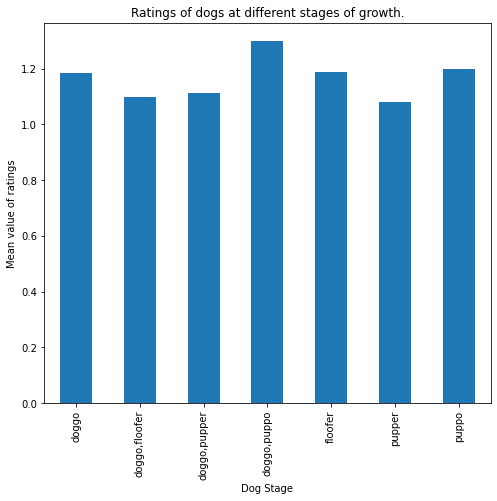

In [150]:
dog_stage_analysis.plot(kind = 'bar', figsize=(8,7));
plt.title('Ratings of dogs at different stages of growth.')
plt.xlabel('Dog Stage');
plt.ylabel('Mean value of ratings');

puppo fetches the highest ratings while as pupper gets least rating.

## Q2: Are highly rated dogs most liked or retweeted?

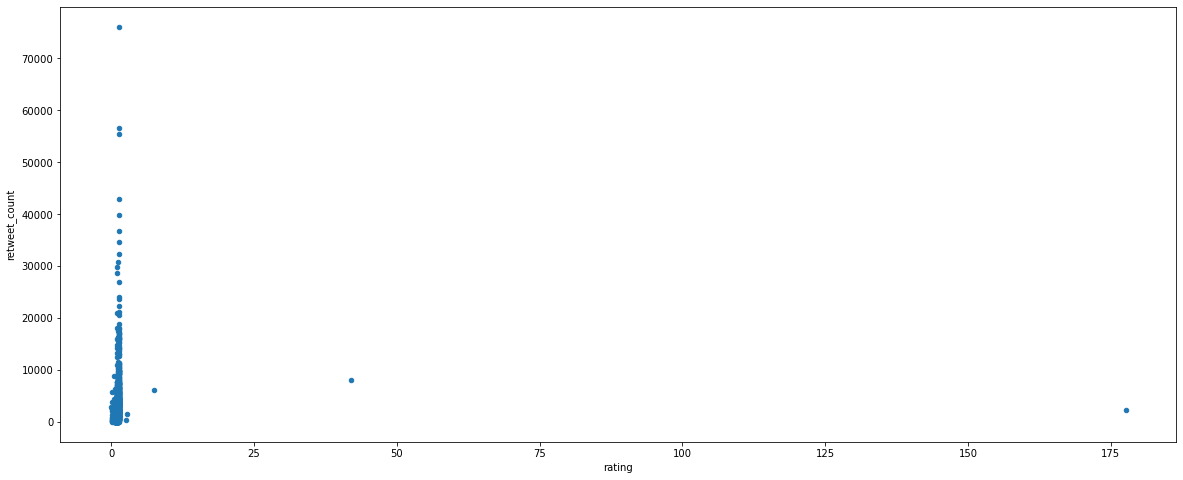

In [164]:
#plot the ratings on x axis and the retweet count on the y axis.
twitter_data_clean.plot(x="rating", y="retweet_count",kind ='scatter',figsize=(20,8));

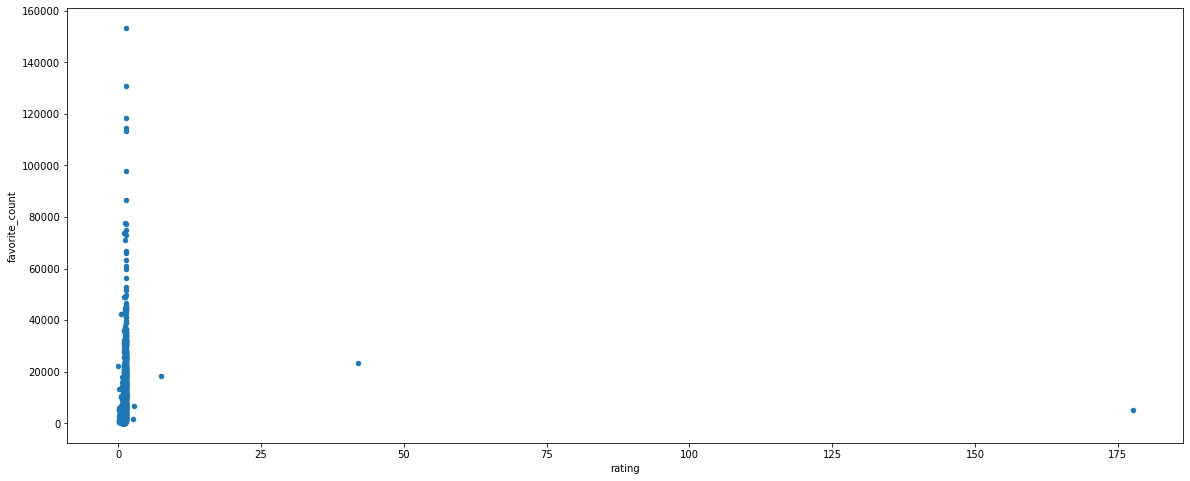

In [152]:
twitter_data_clean.plot(x="rating", y="favorite_count",kind ='scatter',figsize=(20,8));

Highly rated dogs are not the most liked tweets or retweeted ones, even though, the dog tweets which get most retweet also get a lot of likes. It can also be seen dog tweets with lowest rating have high number of likes and shares.

In [156]:
#favorite_count > 10050.75
# t_archive_clean.query('favorite_count > 10050.75').groupby('dog_stage').count()
liked= t_archive_clean.query('favorite_count > 10050.75')

In [157]:
# t_archive_clean.query('rating > 1.2').groupby('dog_stage').count()
rated = t_archive_clean.query('rating > 1.2')

In [159]:
# liked.groupby('dog_stage').count()
# rated.groupby('dog_stage').count()

## Q3: Most common/popular dog name?

In [160]:
a = twitter_data_clean.groupby('name').count()
a.query('tweet_id >= 10')

,tweet_id,text,dog_stage,retweet_count,favorite_count,rating
name,,,,,,
Charlie,11,11,1,10,10,11
Cooper,10,10,3,10,10,10
Lucy,11,11,1,10,10,11
Oliver,10,10,2,10,10,10


In [166]:
twitter_data_clean.groupby('name').count().sort_values(by=['tweet_id'],ascending=False)

,tweet_id,text,dog_stage,retweet_count,favorite_count,rating
name,,,,,,
Lucy,11,11,1,10,10,11
Charlie,11,11,1,10,10,11
Cooper,10,10,3,10,10,10
Oliver,10,10,2,10,10,10
Penny,9,9,0,9,9,9
...,...,...,...,...,...,...
Gustaf,1,1,0,1,1,1
Gustav,1,1,0,1,1,1
Gòrdón,1,1,0,1,1,1


Lucy and charlie are the most common dog names.

In [161]:
# create a mask for most popular dogs
rated = twitter_data_clean.query('rating > 1.2')

In [162]:
b = rated.groupby('name').count()
b.query('tweet_id > 2')

,tweet_id,text,dog_stage,retweet_count,favorite_count,rating
name,,,,,,
Charlie,3,3,0,3,3,3
Daisy,3,3,0,3,3,3
Oliver,3,3,1,3,3,3
Stanley,3,3,0,3,3,3
Tucker,3,3,0,3,3,3


In [167]:
rated.groupby('name').count().sort_values(by=['tweet_id'],ascending=False)

,tweet_id,text,dog_stage,retweet_count,favorite_count,rating
name,,,,,,
Stanley,3,3,0,3,3,3
Daisy,3,3,0,3,3,3
Charlie,3,3,0,3,3,3
Oliver,3,3,1,3,3,3
Tucker,3,3,0,3,3,3
...,...,...,...,...,...,...
Iggy,1,1,0,1,1,1
Ike,1,1,0,1,1,1
Ito,1,1,0,1,1,1


So, charlie is the most common dog name and also the most popular one.


charlie and oliver both feature in the top five of both the most common dogname list and the most popular dog name list.

<a id='conclusions'></a>
# Conclusions

> **Limitations:**
><li>Dog stage information was not available for all the database entries. So, whatever conclusions I drew from the analysis is based on a limited data sample.</li>
><li>I have not explored the relationship between the time a tweet has been sitting on the WeRateDogs page and whether that allows it accumulate more likes and retweets. </li>
><li>Extraction of names became complicated for tweets with more than one dog or for tweets where manual effort was required, so I only focused on removing wrong name entries and extracting dog names programmatically where possible. Thus, my analysis on the dog names is not based on entirety of the data available. </li>
><li>I did not explore the impact of dog breed on the rating the dog garnered .This information can effect the rating we expect for a particular tweet on WeRateDogs platform. </li>

I can conclude from the analysis that a dog which is a puppo gets rated highly and next to it comes doggo. The ratings are even better if there is more than one dog in the picture, with some in the doggo stage and some in puppo stage. Also,low rating on a dog tweet does not mean that it will have least favouirte count or less number of retweets, infact I observed the opposite but this can be also be because of the lifetime the tweet has spent sitting on the platform (something I did not explore). Lastly, one way to influence higher rating for your dog can be done by naming him one of the 5 most popular names like Stanley, Daisy, Charlie, Oliver or Tucker but if you also want the names to be unique then avoid the name Charlie and Oliver because they feature in the most common dog names list as well.